#Interpreting Coefficients


# Lesson Objectives
By the end of this lesson, students will be able to:

Retrieve the coefficients from the model and visualize
Explain what the coefficients represent to a non-technical stakeholder.
Now that we have learned how to properly diagnose a Linear Regression model and can confirm that our model meets the assumptions, we can extract insight from the coefficients that our model determines for each feature.

The coefficients of a linear regression model are the numbers by which each feature is multiplied in order to predict a dependent target variable.

Simple linear regression models are defined as the slope of a line.

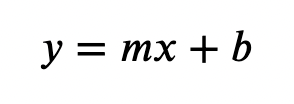

where:

x is an independent variable or feature,

y is a dependent variable or target,

m is the coefficient/slope of x

b is some intercept term that represents the value of y when x = 0.

You may also have seen b referred to as c for constant.
Multiple linear regression simply adds more x’s and m’s, one for each feature.

Once we have more than 1 m, we switch to using the greek letter beta (β) with a subscript number to indicate which column it is associated with.
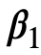 is the coefficient for the first X column 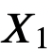
We refer to the constant, which doesn't have a corresponding feature as 
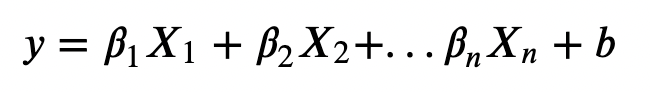

where:

n = the number of independent variables.
In this lesson we will walk through extracting the coefficients from our OLS model, visualize them, interpret their meaning, and use them to provide insights for a stakeholder.

# Imports and Loading the Model


In [1]:
## Standard Statsmodels import
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.facecolor'] = 'white'
plt.style.use(['seaborn-talk'])
# pd.set_option('display.max_columns',25)

/var/folders/l7/w6kg6nmd3dgfd2wj06wwdb1c0000gn/T/ipykernel_23023/3900563112.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-talk'])


In [2]:
## The original dataset
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTiitWN7DnJMRDcRvMKL3_xu5Y0fl2u5J2vWOrJOcOy95ZiBulg5HqMftWWeiYFYYNHMuVPDWT_vxVc/pub?output=csv")
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,1100000,2,1.75,2050,11900,1.0,0,2050,0,1950,0,98004
1,430000,3,1.50,1690,9708,1.5,0,1690,0,1954,0,98006
2,2150000,3,2.75,3470,9610,3.0,1,3470,0,1989,2000,98034


## Function and Data From Previous Lesson


In [3]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    
    """
    ## Make predictions and calculate residuals
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid, line='45',fit=True,ax=axes[0]);
    
    ## Homoscedascity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()

## Loading the Data and Model From Last Lesson with Joblib
We are now going to load in all of the X and y variables, model, and preprocessing tools from the prior lesson by loading in our joblib file.
To remind you: we had saved all of those variables in a dictionary and then saved the dictionary as a joblib file.

In [4]:
import joblib
loaded_data = joblib.load("ols_results.joblib")
loaded_data.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'Outlier Scaler', 'Column Transformer', 'OLS Results'])

We can now assign new variable names to the values in our dictionary to work with the data just like we have previously.

In [5]:
## Saving the dictionary data into separate variables
X_train_df = loaded_data['X_train']
y_train = loaded_data['y_train']
X_test_df  = loaded_data['X_test']
y_test = loaded_data['y_test']
##  Saving the model and processing tools to new vars
result = loaded_data['OLS Results']
outlier_scaler = loaded_data['Outlier Scaler']
preprocessor = loaded_data['Column Transformer']

If everything was saved fully-intact, we should be able to display the result.summary() and also run our evaluation function.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     187.3
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:51:03   Log-Likelihood:                -48210.
No. Observations:                3687   AIC:                         9.657e+04
Df Residuals:                    3610   BIC:                         9.705e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -1.972e+04   2814.752     -7.007

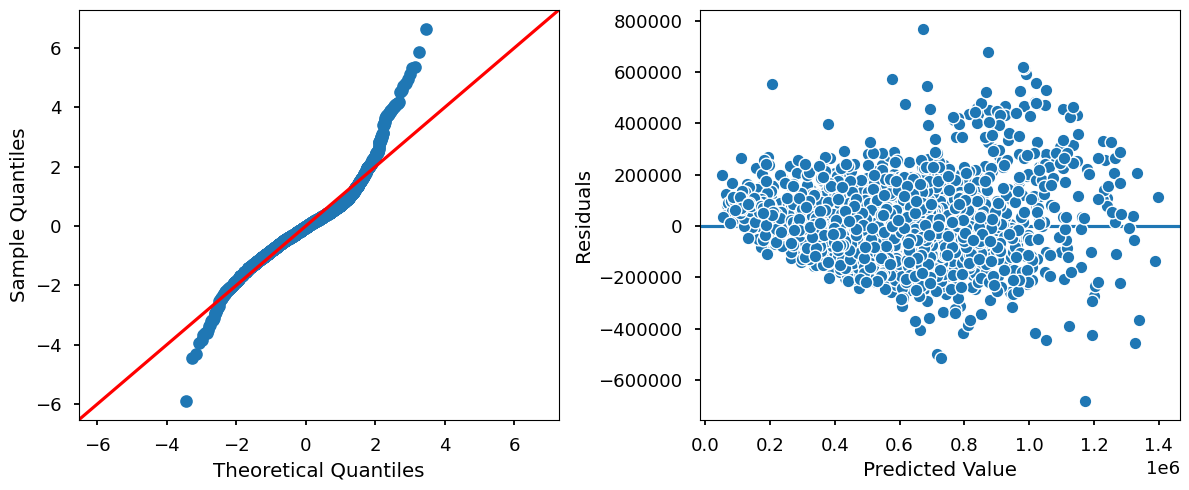

In [6]:
print(result.summary())
evaluate_ols(result,X_train_df, y_train)

## Interpreting Coefficients
Getting the Coefficients from the Model
In order to more easily interpret and visualize the coefficients that our model determined, we will want to extract them from the model as pandas Series. Thankfully, Statsmodels makes this very easy!

For statsmodel's OLS, we can access the coefficients from the result variable's .params attribute.
It is already a pandas Series and already has the feature names as the index

In [7]:
## Getting statsmodels coefficients
coeffs = result.params
coeffs

bedrooms         -19723.359525
bathrooms         28172.329800
sqft_living         207.233425
floors           -41138.398629
waterfront       418376.338039
                     ...      
zipcode_98178   -158056.037850
zipcode_98188   -185179.202932
zipcode_98198   -190653.807548
zipcode_98199    221153.926332
const            177606.752950
Length: 78, dtype: float64

### Splitting the Coefficients When There's too many to visualize
Our one-hot-encoded zipcodes created a very large number of features.

To facilitate analyzing and visualizing the coefficients, we can separate them out so that all of the zipcode coefficients are grouped together in a separate Series.
Advanced Tip:

The .index and .columns of DataFrame/Series are ALSO Series.
This means we can use our .str. methods to filter our coefficients by name.

In [9]:
## Getting the True/False for which are zipcode cols
zip_cols = coeffs.index.str.contains('zipcode')

In [10]:
## slicing out the zicode coefficents to a separate series
coeffs_zips = coeffs.loc[zip_cols].copy()
coeffs_zips

zipcode_98001   -203278.840933
zipcode_98002   -204908.623666
zipcode_98003   -200571.992824
zipcode_98004    457266.881184
zipcode_98005    176257.225821
                     ...      
zipcode_98177     66476.390534
zipcode_98178   -158056.037850
zipcode_98188   -185179.202932
zipcode_98198   -190653.807548
zipcode_98199    221153.926332
Length: 70, dtype: float64

In [11]:
# slicing out the zicode coefficents to a separate series
# coeffs_main will have all coefficients EXCEPT those for zip code
coeffs_main = coeffs.loc[~zip_cols].copy()
coeffs_main

bedrooms         -19723.359525
bathrooms         28172.329800
sqft_living         207.233425
floors           -41138.398629
waterfront       418376.338039
sqft_basement       -73.783983
yr_renovated         24.836621
const            177606.752950
dtype: float64

### Interpreting Our Models' Coefficients
Each coefficient tells us: "when this feature is increased by a value of 1, the target will change by this much".

Let's take a look at the non-zipcode coeffs, and let's sort them by values so we can see the factor that positively influence price grouped together, as well as the ones that negatively influence price.

In [13]:
## Sorting the coefficients largest to smallest
coeffs_main = coeffs_main.sort_values(ascending=False)
coeffs_main

waterfront       418376.338039
const            177606.752950
bathrooms         28172.329800
sqft_living         207.233425
yr_renovated         24.836621
sqft_basement       -73.783983
bedrooms         -19723.359525
floors           -41138.398629
dtype: float64

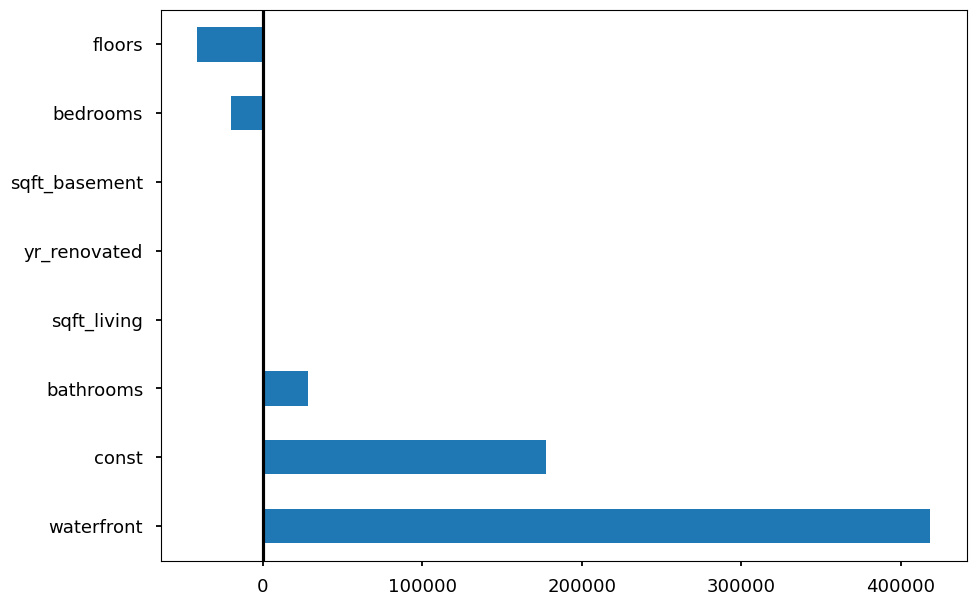

In [14]:
# We can also visualize our coeffiicents, as long as we do not include too many
coeffs_main.plot(kind='barh')
plt.axvline(0,color='k');

### Features that Increase a Home's Value (have a + coefficient)
For the waterfront feature:

We can see that having waterfront property will add $418,376.34 to our home's sale price!
Considering what we may know about real estate value, this is a large but plausible value.
Let's skip over the "const" for just a moment.

For the bathrooms feature:

We can see that increase the number of bathrooms by 1 will add $28,172.33 to the home's value.
For sqft_living:

Each additional sqft of living space will increase the home's value by $207.23

For yr_renovated:

Each additional year added to the year it was renovated adds $24.84 to the home's value.
This means that the more recently it has been renovated, the higher the price (but not by very much).

### Features that decrease a Home's Value (have a - coefficient)
For sqft_basement:

Each additional sqft subtracts $73.78 from the price.
For bedrooms:

Each bedroom added subtracts $19,723.36 from the price.
For floors:

Each additional floor subtracts $41,138.40 from the homes price.

### "But, wait a minute..."
You may be thinking "How in the world could adding bedrooms or floors decrease a home's value? Something seems fishy..."
You may be right! Let's visualize these features and then revisit the question

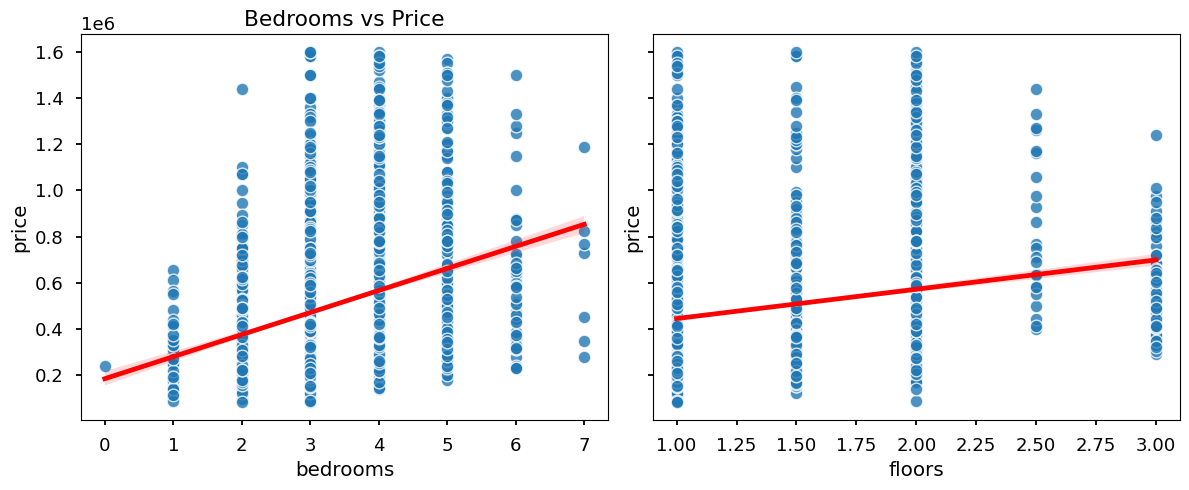

In [15]:
## visualizing variables with large negative ceoffs
fig, axes = plt.subplots(ncols=2, figsize=(12,5),
                         sharey=True)
sns.regplot(x=X_train_df['bedrooms'], y=y_train,
            scatter_kws={'ec':'white','lw':1},
            line_kws={'color':'red'}, ax=axes[0])
axes[0].set_title('Bedrooms vs Price')
sns.regplot(x=X_train_df['floors'], y=y_train,
            scatter_kws={'ec':'white','lw':1},
            line_kws={'color':'red'}, ax=axes[1])
plt.tight_layout()

OK, so it looks like bedrooms has a positive relationship with price (mostly).
#### So why does the model calculate a negative coefficient for bedrooms?
Let's answer that by doubling back to discuss the coefficient we skipped: the constant!

### The Constant as a Baseline
Let's revisit the meaning of the constant/intercept that our model determined.

In a simple regression, the y-intercept is the value where the regression line cross the y-axis. In other words, it is the value when X=0.

So we can think of our constant as the baseline value of a home BEFORE we add in the effects of all of the other features.

Depending on the features included, our model could have determined a negative intercept would have been a better fit!
So, keeping this understanding of the constant in mind, let's examine our value and how that relates back to the price.

Our model used a constant of $177,606 as the baseline price (before factoring in the actual features). Now, if we only had these main coefficient in our model, our results would seem kind of strange.

But we have a second series full of additional coefficients that we set aside earlier.
### So what's the effect of zipcodes?

In [16]:
## formatting our axis to match our dataframe floats
from matplotlib.ticker import StrMethodFormatter

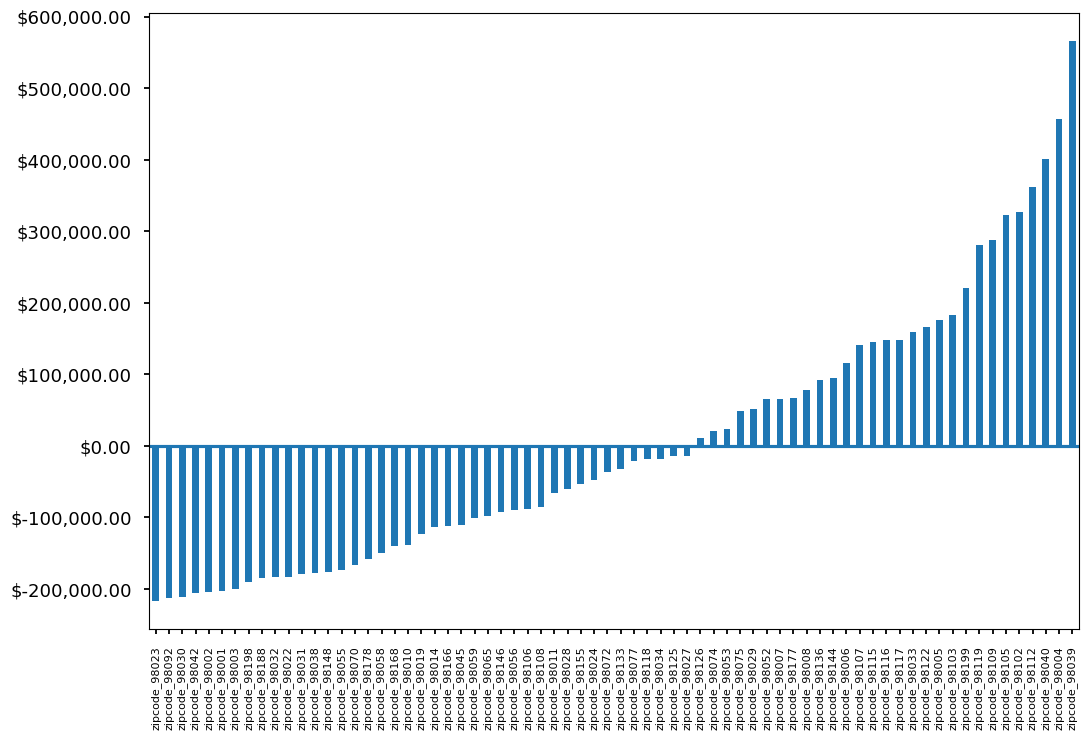

In [17]:
ax = coeffs_zips.sort_values().plot(kind='bar',figsize=(12,8))
ax.axhline()
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.2f}'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=8);

We can see that some zipcodes add over $500,000 to the home's price!
Keeping these zipcode coefficients in mind, our effect of bedrooms doesn't seem quite as crazy.
### What if we hadn't used zipcode?


In [18]:
X_train_no_zips = X_train_df.loc[:,~zip_cols]
X_test_no_zips = X_test_df.loc[:,~zip_cols]
display(X_train_no_zips.head(2),
       X_test_no_zips.head(2))

,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_basement,yr_renovated,const
1344,3.0,1.75,1850.0,1.0,0.0,0.0,0.0,1.0
1282,3.0,2.25,1870.0,1.0,0.0,430.0,0.0,1.0


,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_basement,yr_renovated,const
2041,3.0,2.50,1520.0,1.0,0.0,440.0,0.0,1.0
2607,3.0,2.25,1490.0,2.0,0.0,450.0,0.0,1.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     438.9
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:06:55   Log-Likelihood:                -50037.
No. Observations:                3687   AIC:                         1.001e+05
Df Residuals:                    3679   BIC:                         1.001e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.776e+04   4479.432     -6.198      0.000   -3.65e+04    -1.9e+04
bathrooms      8776.0966   7034.183      1.248      0.212   -5015.186    2.26e+04
sqft_living     200.5980      6.379     31.445      0.000     188.091     213.105
floors         2.848e+04   7908.709      3.601      0.000     1.3e+04     4.4e+04
waterfront      2.93e+05   4.49e+04      6.518      0.000    2.05e+05    3.81e+05
sqft_basement    35.0586      9.224      3.801      0.000      16.975      53.143
yr_renovated     50.1540      7.948      6.310      0.000      34.570      65.737
const          1.159e+05   1.42e+04      8.149      0.000     8.8e+04    1.44e+05
==============================================================================
Omnibus:                      606.354   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1317.222
Skew:                           0.960   Prob(JB):                    9.31e-287
Kurtosis:                       5.211   Cond. No.                     3.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

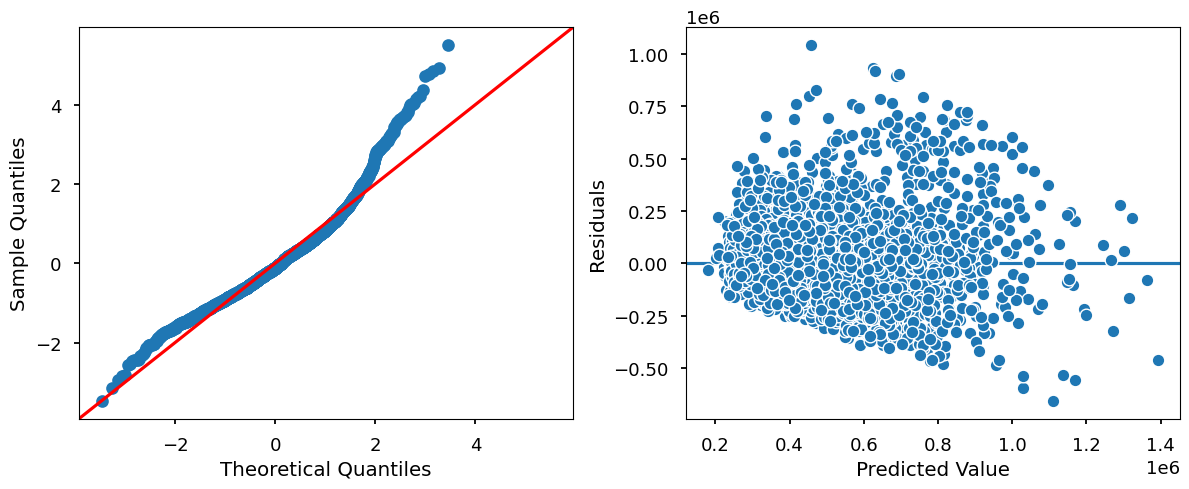

In [19]:
## Fitting a model without zipcodes 
model = sm.OLS(y_train,X_train_no_zips)
result = model.fit()
display(result.summary())
evaluate_ols(result,X_train_no_zips, y_train)

As we can see from r2, we can only explain 46% of the variability in price now that we have excluded information about zipcode/location. Which is much less than our 79% when zipcode was included.

This makes sense because as the saying go, when it comes to real estate its "Location. Location. Location."

#### So, do we leave zipcode in or take it out? 
We must revisit the goals of the stakeholder to determine the best way to proceed.  If they wanted to make predictions, zipcode would be a valuable feature to include.  However, if they are interested in how they could increase a home's value through renovations they can control, our analysis will be more clear if we remove zipcode.  And if this is the case, what other feature should be removed?



#### It is very important to keep in mind that all of the coefficients are being used together and not in a vacuum (including your constant).

Even though some of the values of our coefficients seem a bit odd when considered in a vacuum. We can still use these coefficients to drive recommendations for stakeholders.

### Summary
Now that you can identify which features are significant predictors of price, you can experiment with removing features and iterating your model.  There is no single "correct" answer for model development. You must take into consideration your results and the needs of the stakeholder.  Continue to experiment! What recommendations would you make to your stakeholder?